In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data = pd.read_csv("data/u.user" , sep = "|" , names = ["user-no" , "age" , "gender" , "occupation" , "user_id"])

In [3]:
gender_age = dict()
occupation_dict = defaultdict(int)

In [4]:
for index ,row in data.iterrows():
    gender = row["gender"]
    age = int(row["age"])//10
    if gender not in gender_age:
        gender_age[gender] = dict()
    if age not in gender_age[gender]:
        gender_age[gender][age]  = 0     
    gender_age[gender][age] +=1 
    occupation_dict[row["occupation"]] +=1

gender_age ["F"][0] = 0

In [5]:
mens_count  = []
women_count = []
for i in range(8):
    mens_count.append(gender_age["M"][i])
    women_count.append(gender_age["F"][i])

In [6]:
sum(gender_age["M"].values())

670

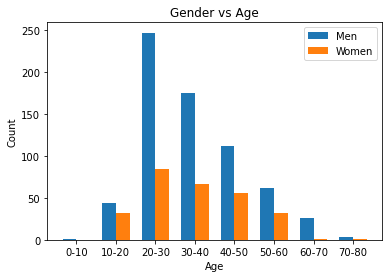

In [7]:
N = 8
men_means = tuple(mens_count)
women_means = tuple(women_count)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender vs Age')

plt.xticks(ind + width / 2, ('0-10', '10-20', '20-30', '30-40', '40-50','50-60','60-70','70-80'))
plt.legend(loc='best')
plt.savefig("Gender_vs_age.png")
plt.show()

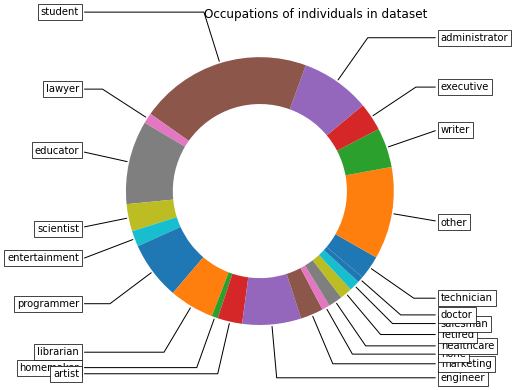

In [8]:
occupations = []
count = []

for i in occupation_dict:
    occupations.append(i)
    count.append(occupation_dict[i])

fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(aspect="equal"))

recipe = occupations

data = count

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Occupations of individuals in dataset" , loc = "right")
plt.savefig("Occupations.png") 
plt.show()

In [9]:
ratings_data = pd.read_csv("data/u.data",sep='\t',names = ["user","movie","ratings","id"])

In [10]:
ratings_dict = defaultdict(int)

In [11]:
for index, row in ratings_data.iterrows():
    ratings_dict[int(row["ratings"])] +=1

In [12]:
arr = [1,2,3,4,5]
ratings_count = []
for i in arr:
    ratings_count.append(ratings_dict[i])
    
    

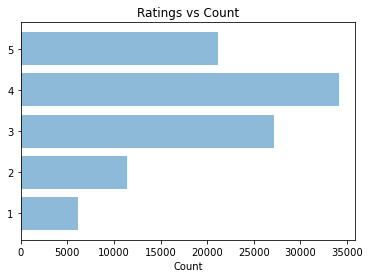

In [13]:
objects = arr
y_pos = np.arange(len(objects))
performance = ratings_count

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.title('Ratings vs Count')
plt.savefig("Ratings_vs_count.png")
plt.show()